In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()

X = iris.data
X = X[:, [2,3]]
y = iris.target



In [19]:
class Node():
    def __init__(self, feature_index = None, threshold = None, left = None, right = None, info_gain = None, value = None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value
        
class DecisionTreeClassifier():
    def __init__(self, min_sample_split = 2, max_depth = 2):
        self.root = None
        self.min_sample_split = min_sample_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth = 0):
        X, y = dataset[:,:2], dataset[:,2:]
        num_samples, num_features = np.shape(X)
         
        if num_samples >= self.min_sample_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"] > 0 :
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth + 1)
                right_subtree  = self.build_tree(best_split["dataset_right"], curr_depth + 1)
                return Node(best_split["feature_index"], best_split["threshold"], left_subtree, right_subtree, best_split["info_gain"])
        leaf_value  = self.calculate_leaf_value(y)
        return Node(value = leaf_value)
    
    
    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_info_gain = -float("inf")
        for feature_index in range(num_features):
            feature_value = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_value)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left) > 0  and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:,-1], dataset_left[:,-1], dataset_right[:,-1]
                    curr_info_gain = self.infomation_gain(y, left_y, right_y)
                    if curr_info_gain > max_info_gain:
                        max_info_gain = curr_info_gain
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def infomation_gain(self, parent, l_child, r_child):
        weight_l = len(l_child)/len(parent)
        weight_r = len(r_child)/len(parent)
        gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        class_label = np.unique(y)
        entropy = 0
        for clf in class_label:
            p_cls = len(y[y==clf])/len(y)
            entropy = - p_cls * np.log2(p_cls)
        return entropy
    
    def calculate_leaf_value(self,y):
        y = list(y)
        return max(y, key = y.count)
    
    
    def fit(self, X, y):
        datasets = np.concatenate((X, y), axis=1)
        self.root = self.build_tree(datasets)
        
    def predict(self, X):
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
    
    def make_prediction(self, x, tree):
         if tree.value!=None: return tree.value
         feature_val = x[tree.feature_index]
         if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
         else:
            return self.make_prediction(x, tree.right)

In [20]:
y = np.array(y)
y = y.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=41)
classifier = DecisionTreeClassifier(min_sample_split=3, max_depth=3)
classifier.fit(X_train, Y_train)

In [21]:
Y_pred = classifier.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8333333333333334

In [65]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.2):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  M_ = np.array([xx1.ravel(), xx2.ravel()]).T
  Z = classifier.predict(M_)
  Z = np.array(Z)
  Z = Z.reshape(xx1.shape)
  print(Z.shape)
  print(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3)
  c = np.array([1,1,1])
  for idx, cl in enumerate(np.unique(y)):
    for x in range(len(X)):
      if y[x] == cl and c[cl] == 1:
           plt.scatter(x=X[x][0], y=X[x][1], alpha=0.8, color=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
           c[cl] = 0
      elif  y[x] == cl and c[cl] == 0 :
            plt.scatter(x=X[x][0], y=X[x][1], alpha=0.8, color=colors[idx], marker=markers[idx], edgecolor='black')
    


(21, 34)
(21, 34)


C:\Users\HungVo\AppData\Local\Temp\ipykernel_525588\1189313325.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[x][0], y=X[x][1], alpha=0.8, color=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
C:\Users\HungVo\AppData\Local\Temp\ipykernel_525588\1189313325.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[x][0], y=X[x][1], alpha=0.8, color=colors[idx], marker=markers[idx], edgecolor='black')


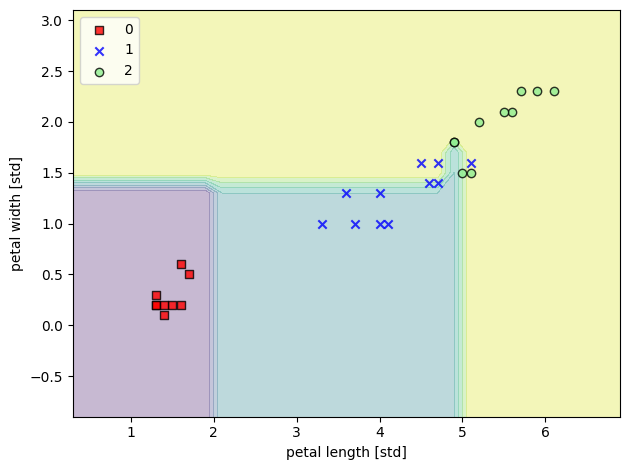

In [66]:
plot_decision_regions(X_test, Y_test, 
                      classifier=classifier,
                      test_idx=range(105, 150))

plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()